In [18]:
#import a bunch of things

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



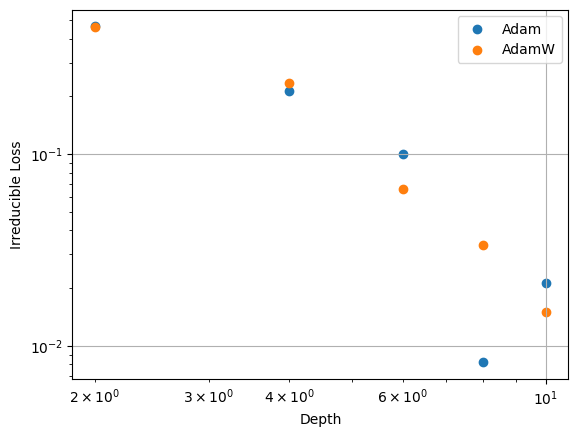

In [20]:
#read in the data
data = pd.read_csv("experiment_results.csv")
irreducible_loss = 1.25
adam_results = data['Final Loss with Adam']
adamw_results = data['Final Loss with AdamW']
depths = data['Depth']
#subtract 1.511 from all the results
adam_results = adam_results-irreducible_loss
adamw_results = adamw_results-irreducible_loss
plt.scatter(depths, adam_results, label='Adam')
plt.scatter(depths, adamw_results, label='AdamW')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Depth')
plt.ylabel('Irreducible Loss')
plt.grid(True)
plt.legend()
plt.show()



#secon plot of loss differences
# loss_differences = adamw_results - adam_results
# plt.scatter(depths, loss_differences)
# plt.xscale('log')
# plt.grid(True)
# plt.show()

#plot the data
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="depth", y="loss", data=data, hue="activation")
# plt.show()


# Figure Out How to Convert to Compute Multiplier